In [1]:
import owlready2 as owlr
import pandas as pd
from rdflib import URIRef, Literal, Graph
from rdflib.namespace import RDF, RDFS
from rdflib import Namespace
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph

from collections import Counter
import uuid

import io
import pydotplus
from IPython.display import display, Image
from rdflib.tools.rdf2dot import rdf2dot
from IPython.core.display import HTML

def visualize(g):
    stream = io.StringIO()
    rdf2dot(g, stream, opts = {display})
    dg = pydotplus.graph_from_dot_data(stream.getvalue())
    png = dg.create_png()

    display(Image(png))


import networkx as nx


* Owlready2 * Warning: optimized Cython parser module 'owlready2_optimized' is not available, defaulting to slower Python implementation


In [2]:
data_rows = [{ "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "PersonID", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "FirstName", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "FamilyName", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "DateOfBirth", 
             "DataType" : "date"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Person", 
             "Attribute" : "DateOfDeath", 
             "DataType" : "date"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Address Line 1", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Address Line 2", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Address Line 3", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Postal Code", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Country", 
             "DataType" : "string"}, 
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Address", 
             "Attribute" : "Country", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Product", 
             "Attribute" : "Coverage Type", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Policy", 
             "Attribute" : "Policy ID", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Policy", 
             "Attribute" : "Start Date", 
             "DataType" : "string"},
            { "Business Domain" : "Core", 
             "Model" : "Principal Interactions", 
             "ModelType" : "Conceptual", 
             "Entity" : "Insurance Policy", 
             "Attribute" : "End Date", 
             "DataType" : "string"},
             
            ]

pd.DataFrame(data_rows)

,Business Domain,Model,ModelType,Entity,Attribute,DataType
0,Core,Principal Interactions,Conceptual,Person,PersonID,string
1,Core,Principal Interactions,Conceptual,Person,FirstName,string
2,Core,Principal Interactions,Conceptual,Person,FamilyName,string
3,Core,Principal Interactions,Conceptual,Person,DateOfBirth,date
4,Core,Principal Interactions,Conceptual,Person,DateOfDeath,date
5,Core,Principal Interactions,Conceptual,Address,Address Line 1,string
6,Core,Principal Interactions,Conceptual,Address,Address Line 2,string
7,Core,Principal Interactions,Conceptual,Address,Address Line 3,string
8,Core,Principal Interactions,Conceptual,Address,Postal Code,string
9,Core,Principal Interactions,Conceptual,Address,Country,string


In [3]:
onto = owlr.get_ontology("datamodels_rdf.owl").load()

* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#Contains belongs to more than one entity types: [owl.ObjectProperty, datamodels_rdf.MetaProperty]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#MemberOf belongs to more than one entity types: [owl.ObjectProperty, datamodels_rdf.MetaProperty]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#FromAttribute belongs to more than one entity types: [owl.ObjectProperty, datamodels_rdf.MetaClass, datamodels_rdf.RelationshipLinkage]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http://www.semanticweb.org/tomk/ontologies/2022/9/datamodel#FromClass belongs to more than one entity types: [owl.ObjectProperty, datamodels_rdf.MetaClass, datamodels_rdf.RelationshipLinkage]; I'm trying to fix it...
* Owlready2 * WARNING: ObjectProperty http:/

In [4]:
def flush(onto):
    for m in onto.Serialization.instances()[0].Contains:
        print(m, m.is_a)
flush(onto)
owlr.sync_reasoner(onto)

* Owlready2 * Running HermiT...
    java -Xmx2000M -cp /usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit:/usr/local/python/py36/lib/python3.6/site-packages/owlready2/hermit/HermiT.jar org.semanticweb.HermiT.cli.CommandLine -c -O -D -I file:////var/folders/rd/q3bhk6_n56x75m05pp2sq7dr0000gn/T/tmpc23f2xnk


datamodels_rdf.Mapping_Attribute [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_AttributeHasDataType [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_Class [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ClassContainsAttribute [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_Context [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ContextContainsClass [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_DomainContainsModel [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_Model [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelContainsClass [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelContainsContext [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelDomain [datamodels_rdf.Mapping]
datamodels_rdf.Mapping_ModelHasModelType [datamodels_rdf.Mapping]


* Owlready2 * HermiT took 0.613476037979126 seconds
* Owlready * Reparenting datamodels_rdf.ToOptionality: {owl.ObjectProperty, datamodels_rdf.RelationshipLinkage} => {datamodels_rdf.RelationshipLinkage}
* Owlready * Reparenting datamodels_rdf.FromClass: {owl.ObjectProperty, datamodels_rdf.RelationshipLinkage} => {datamodels_rdf.MetaClass, datamodels_rdf.RelationshipLinkage}
* Owlready * Reparenting datamodels_rdf.FromOptionality: {owl.ObjectProperty, datamodels_rdf.RelationshipLinkage} => {datamodels_rdf.RelationshipLinkage}
* Owlready * Reparenting datamodels_rdf.ToClass: {owl.ObjectProperty, datamodels_rdf.RelationshipLinkage} => {datamodels_rdf.MetaClass, datamodels_rdf.RelationshipLinkage}
* Owlready * Reparenting datamodels_rdf.ToAttribute: {owl.ObjectProperty, datamodels_rdf.RelationshipLinkage} => {datamodels_rdf.MetaClass, datamodels_rdf.RelationshipLinkage}
* Owlready * Reparenting datamodels_rdf.FromAttribute: {owl.ObjectProperty, datamodels_rdf.RelationshipLinkage} => {data

In [5]:
# Collect mappings from a given serializatin
def get_contents_matching_subclass(s, subclass):    
    m_list = []
    if not isinstance(subclass, list):
        subclass = [subclass]
    for m in s.Contains:
        if any([(c in subclass or x in subclass) for c in m.is_a for x in m.is_a.first().is_a]):
            m_list.append(m)
    return m_list

def get_schema_labels(s):
    labels=[]
    for m in get_contents_matching_subclass(s,[onto.EntityMapping]):
        print(m)
        if len(m.SerializationLabel)>0:
            labels.extend(m.SerializationLabel)
    
    for m in get_contents_matching_subclass(s,[onto.DataPropertyMapping]):
        print(m)
        if len(m.MappingRange)>0:
            labels.extend(m.MappingRange)
    
    return labels

In [6]:
get_schema_labels(onto.EntityAttributeRecord)

datamodels_rdf.Mapping_Attribute
datamodels_rdf.Mapping_Class
datamodels_rdf.Mapping_Context
datamodels_rdf.Mapping_Model
datamodels_rdf.Mapping_ModelDomain
datamodels_rdf.Mapping_AttributeHasDataType
datamodels_rdf.Mapping_ModelHasModelType


['Attribute',
 'Class',
 'Context',
 'Model',
 'ModelDomain',
 'DataType',
 'ModelType']

In [7]:
list(data_rows[0].keys())

['Business Domain', 'Model', 'ModelType', 'Entity', 'Attribute', 'DataType']

In [8]:
serial_key = { "Business Domain" : "ModelDomain", 
             "Model" : "Model", 
             "ModelType" : "ModelType", 
             "Entity" : "Class", 
             "Attribute" : "Attribute", 
             "DataType" : "DataType", 
             "Context" : "Context"}

In [9]:
entities = get_contents_matching_subclass(onto.EntityAttributeRecord, onto.EntityMapping)
data_properties = get_contents_matching_subclass(onto.EntityAttributeRecord, onto.DataPropertyMapping)
properties = get_contents_matching_subclass(onto.EntityAttributeRecord, onto.PropertyMapping)



In [10]:
get_contents_matching_subclass(onto.EntityAttributeRecord, onto.Mapping)



[datamodels_rdf.Mapping_Attribute,
 datamodels_rdf.Mapping_AttributeHasDataType,
 datamodels_rdf.Mapping_Class,
 datamodels_rdf.Mapping_ClassContainsAttribute,
 datamodels_rdf.Mapping_Context,
 datamodels_rdf.Mapping_ContextContainsClass,
 datamodels_rdf.Mapping_DomainContainsModel,
 datamodels_rdf.Mapping_Model,
 datamodels_rdf.Mapping_ModelContainsClass,
 datamodels_rdf.Mapping_ModelContainsContext,
 datamodels_rdf.Mapping_ModelDomain,
 datamodels_rdf.Mapping_ModelHasModelType]

In [11]:
onto.EntityMapping.is_a

[datamodels_rdf.Mapping]

In [12]:
entities[0].__class__, entities[0].is_a

(datamodels_rdf.EntityMapping, [datamodels_rdf.EntityMapping])

In [13]:
entities[0].is_instance_of

[datamodels_rdf.EntityMapping]

In [14]:
data_rows[0][entities[0].SerializationLabel.first()]

'PersonID'

In [15]:
data_rows[0]

def remap(d, mapper):
    return {v:d.get(k) for k,v in mapper.items()}
    
        

In [30]:
entities

[datamodels_rdf.Mapping_Attribute,
 datamodels_rdf.Mapping_Class,
 datamodels_rdf.Mapping_Context,
 datamodels_rdf.Mapping_Model,
 datamodels_rdf.Mapping_ModelDomain]

In [59]:
lineage_tree = {e.SerializationLabel.first():e.SerializationParentLabel.first() for e in entities}

def get_lineage(d, l, acc=None):
    if acc is None:
        if l is not None:
            acc=[l]
    q = d.get(l)
    if q is not None:
        acc.append(q)
        acc = get_lineage(d, q, acc)
    return acc
    


get_lineage(lineage_tree,'Context')



['Context', 'Model', 'ModelDomain']

In [91]:

def gen_content(onto, row, entities, properties, data_properties, lineage_tree, batch_catalog):
    triples = []
    top_level_objects = {}
    label_d = {}
    for e in entities:
        key = uuid.uuid4().hex
        subj = e.SerializationLabel.first()
        e_type = e.MappingMetaTarget.first()
        data = row[e.SerializationLabel.first()]
        if data is not None:
            if data not in batch_catalog:
                batch_catalog[data]=URIRef(key)
                label_d[subj]=URIRef(key)
            else:
                label_d[subj]=batch_catalog[data]

                
            subj=label_d[e.SerializationLabel.first()]
            props = { RDF.type : URIRef(e_type.iri),
                                  RDFS.label : Literal(data)}
            top_level_objects[data]=None

            for k,v in props.items():
                triples.append([subj, k, v])
            
    for d in data_properties:
        subj = label_d.get(d.MappingDomain.first())
        if subj is not None:
            prop = URIRef(d.MappingMetaTarget.first().iri)
            obj = Literal(row[d.MappingRange.first()])
            triples.append((subj, prop, obj))

    for p in properties:
        subj = label_d.get(p.MappingDomain.first())
        if subj is not None:
            prop = URIRef(p.MappingMetaTarget.first().iri)

    #        obj = Literal(row[p.MappingRange.first()])
            obj = label_d.get(p.MappingRange.first())
            if obj is not None:
                triples.append((subj, prop, obj))
    
    for e in entities:
        if row.get(e.SerializationLabel.first()) is not None:
            lineage = get_lineage(lineage_tree, e.SerializationLabel.first())
            lineage = ".".join([row.get(l) if row.get(l) is not None else "_" for l in lineage][::-1])
            
            #print("\t", e.MappingMetaTarget.first(), lineage)
            subj = label_d.get(e.SerializationLabel.first())
            if subj is not None:
                prop = URIRef(onto.UniqueIdentifier.iri)
                obj = Literal(lineage)
                triples.append((subj, prop, obj))
                top_level_objects[subj]=lineage

                

    return triples, batch_catalog

triples =  []
catalog = {}
for row in data_rows:
    t, catalog = gen_content(onto, remap(row, serial_key), entities, properties, data_properties, lineage_tree,catalog)
    triples.extend( t )

In [92]:
len(triples)

255

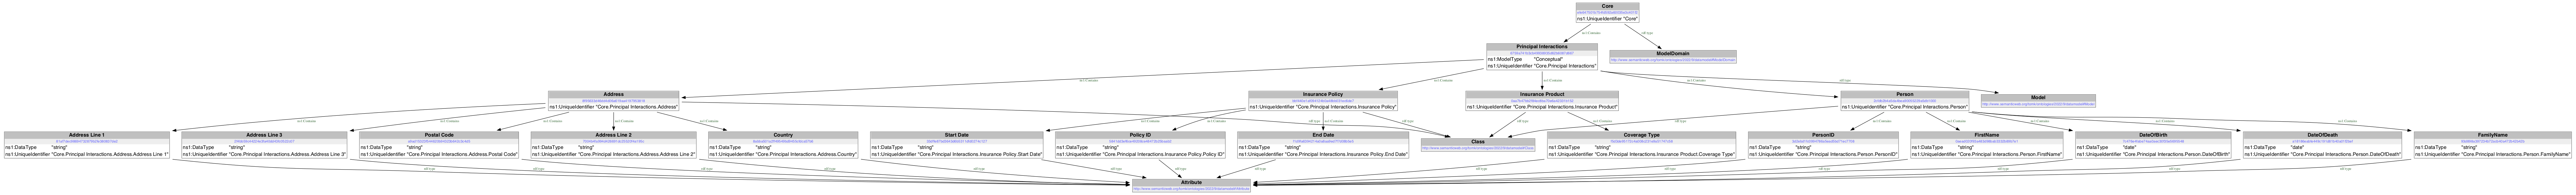

In [93]:
row_g = Graph()

for t in triples:
    row_g.add(t)
    
visualize(row_g)

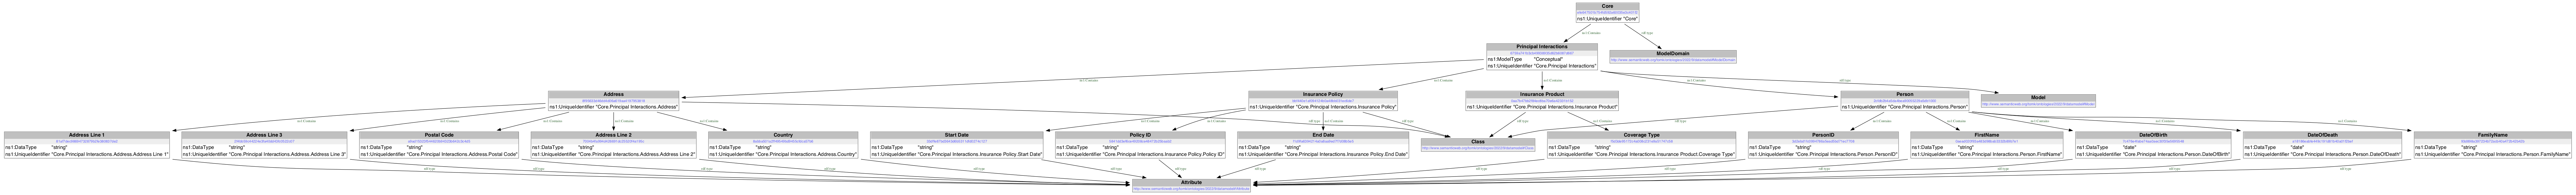

In [94]:
visualize(row_g)

In [58]:
catalog

{}